# Practica 3 (Regresión logística multiclase y redes neuronales)
### Aprendizaje automático y big data
##### _Alberto García Doménech - Pablo Daurell Marina_    
---

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# cargamos los datos, en este caso 5000 ejemplos de entrenamiento(imagenes 20x20 pixeles)
from scipy.io import loadmat
data = loadmat ('ex3data1.mat')
# se pueden consultar las claves con data.keys()
y = data ['y']
X = data ['X']

np.shape(X) # (5000, 400)
np.shape(y) # (5000,1)

y = y.T[0]

np.shape(y) # (5000,)

m = np.shape(X)[0]
n = np.shape(X)[1]

# añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

(-0.5, 199.5, 19.5, -0.5)

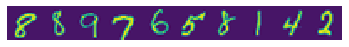

In [60]:
# seleccionamos 10 numeros al azar y los mostramos
sample = np.random.choice(X.shape[0], 10)
plt.imshow(X[sample, 1:].reshape(-1,20).T)
plt.axis('off')

In [16]:
# utilizamos de nuevo las funciones de coste,sigmoide y de gradiente
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cost(Theta, X, Y):
    H = sigmoid(np.matmul(X, Theta))
    cost = (-1 / len(X)) * ( np.matmul(np.log(H).T, Y) + np.matmul(np.log(1-H).T, (1-Y)))
    return cost

def gradient(Theta, X, Y):
    H = sigmoid(np.matmul(X, Theta))
    return ( (1/len(X)) * np.matmul(X.T, H - Y) )

In [68]:
# clasificacion de uno frente a todos
def oneVsAll(X,y,num_etiquetas,reg):
    """
    oneVsAll entrena varios clasificadores por regresión logística con término
    de regularización  'reg'y devuelve el resultado en una matriz, donde la 
    fila i-ésima corresponde al clasificador de la etiqueta i-ésima
    """
    matrix = np.zeros(shape=(m,len(X[0])))
#     entrenamos un clasificador por cada una de las clases del conjunto de datos
    for i in range(num_etiquetas):
        Theta = np.zeros(np.shape(X[0]))
        k = (y == i) * 1
        result = opt.fmin_tnc(func=cost, x0=Theta, fprime=gradient, args=(X, k))
        matrix[i] = result[0]
    return matrix